# TEST GAN PHISHING EMAIL

In [10]:
# import 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# get data
data = pd.read_csv('CEAS_08.csv')

print(data.head())
print("\n")
print(data.info())
print("\n")
print(data.isnull().sum())

                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [26]:
# data preprocessing
header = data.columns.tolist()
data = data.dropna()


print("first email after preprocessing:")
print(data.iloc[0])
print("\n")
print("subject of first email after preprocessing:")
print(data['subject'].iloc[0])
print("\n")
print("body of first email after preprocessing:")
print(data['body'].iloc[0])
print("\n")
print("Data shape after preprocessing:", data.shape)
print("\n")




first email after preprocessing:
sender                       Young Esposito <Young@iworld.de>
receiver                          user4@gvc.ceas-challenge.cc
date                          Tue, 05 Aug 2008 16:31:02 -0700
subject                             Never agree to be a loser
body        Buck up, your troubles caused by small dimensi...
label                                                       1
urls                                                        1
Name: 0, dtype: object


subject of first email after preprocessing:
Never agree to be a loser


body of first email after preprocessing:
Buck up, your troubles caused by small dimension will soon be over!
Become a lover no woman will be able to resist!
http://whitedone.com/


come. Even as Nazi tanks were rolling down the streets, the dreamersphilosopher or a journalist. He was still not sure.I do the same.


Data shape after preprocessing: (38669, 7)




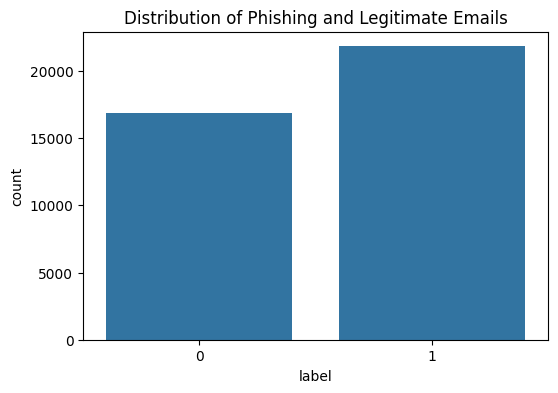

In [ ]:
# distribution of classes
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Phishing and Legitimate Emails')
plt.show()

In [28]:
# combine subject and body for better feature extraction
data['text'] = data['subject'] + ' ' + data['body']
X = data['text']
y = data['label']

# convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Define the GAN components
latent_dim = 100
def build_generator():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(X_vectorized.shape[1], activation='sigmoid')
    ])
    return model
def build_discriminator():
    model = keras.Sequential([
        layers.Dense(1024, activation='relu', input_dim=X_vectorized.shape[1]),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Build and compile the GAN
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

C:\Users\phasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


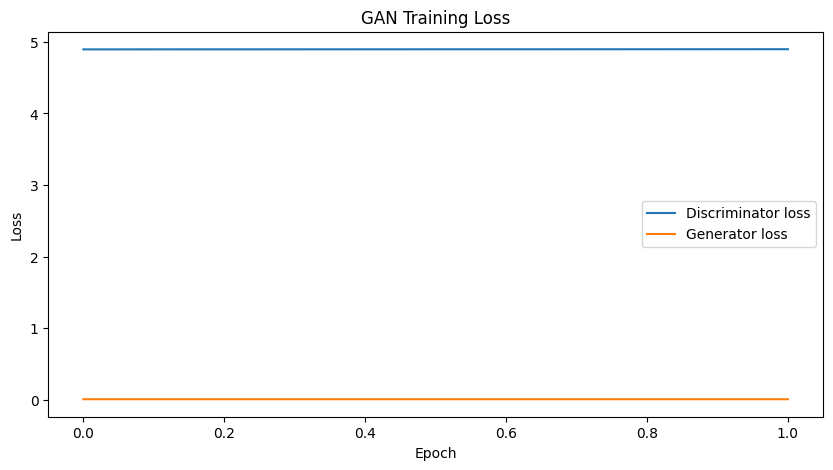

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# train the GAN

def train_gan(gan, generator, discriminator, epochs=10000, batch_size=128):
    plot_interval = 10
    d_losses = []
    g_losses = []
    
    for epoch in range(epochs):
        # Train Discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        real_data = X_train[np.random.randint(0, X_train.shape[0], batch_size)].toarray()
        combined_data = np.vstack((real_data, generated_data))
        labels = np.array([1] * batch_size + [0] * batch_size)
        d_loss = discriminator.train_on_batch(combined_data, labels)
        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        misleading_labels = np.array([1] * batch_size)
        g_loss = gan.train_on_batch(noise, misleading_labels)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")
        
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        
        # ---------------------
        # Plot losses in real time
        # ---------------------
        if epoch % plot_interval == 0 or epoch == 1:
            clear_output(wait=True)
            plt.figure(figsize=(10,5))
            plt.plot(d_losses, label='Discriminator loss')
            plt.plot(g_losses, label='Generator loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('GAN Training Loss')
            plt.legend()
            plt.show()

train_gan(gan, generator, discriminator, epochs=1000, batch_size=128)
